In [1]:
import pandas as pd
import lightgbm as lgb
import lightfm as lfm

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
df_trn = pd.read_csv('../input/microsoft-malware-prediction/train.csv')
df_tst = pd.read_csv('../input/microsoft-malware-prediction/test.csv')

print('dataframe shape', df_trn.shape, df_tst.shape)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dataframe shape (8921483, 83) (7853253, 82)


In [3]:
df_trn.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.00000,0,nan,53447.00000,1.00000,1.00000,1,29,128035.00000,18.00000,35.00000,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.00000,0,NaN,0.00000,137.00000,NaN,1.00000,1.00000,Desktop,Windows.Desktop,2668.00000,9124.00000,4.00000,5.00000,2341.00000,NaN,476940.00000,HDD,299451.00000,0,4096.00000,Desktop,18.90000,1440.00000,900.00000,Desktop,NaN,4294967295.00000,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.00000,119,UNKNOWN,0,IS_GENUINE,Retail,nan,0.00000,Retail,nan,628.00000,36144.00000,0,nan,0.00000,0,0,0.00000,0.00000,10.00000,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.00000,0,nan,53447.00000,1.00000,1.00000,1,93,1482.00000,18.00000,119.00000,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.00000,0,NaN,0.00000,137.00000,NaN,1.00000,1.00000,Notebook,Windows.Desktop,2668.00000,91656.00000,4.00000,5.00000,2405.00000,NaN,476940.00000,HDD,102385.00000,0,4096.00000,Notebook,13.90000,1366.00000,768.00000,Mobile,NaN,1.00000,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.00000,31,UNKNOWN,0,OFFLINE,Retail,nan,0.00000,NOT_SET,nan,628.00000,57858.00000,0,nan,0.00000,0,0,0.00000,0.00000,8.00000,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.00000,0,nan,53447.00000,1.00000,1.00000,1,86,153579.00000,18.00000,64.00000,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.00000,0,NaN,0.00000,137.00000,RequireAdmin,1.00000,1.00000,Desktop,Windows.Desktop,4909.00000,317701.00000,4.00000,5.00000,1972.00000,NaN,114473.00000,SSD,113907.00000,0,4096.00000,Desktop,21.50000,1920.00000,1080.00000,Desktop,NaN,4294967295.00000,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.00000,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,nan,0.00000,Retail,nan,142.00000,52682.00000,0,nan,0.00000,0,0,0.00000,0.00000,3.00000,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.00000,0,na

In [4]:
df_trn.dtypes

MachineIdentifier                                     object
ProductName                                           object
EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
IsBeta                                                 int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
OrganizationIdentifier                               float64
GeoNameIdentifier       

In [5]:
df_trn.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,8921483.00000,0.00001,0.00274,0.00000,0.00000,0.00000,0.00000,1.00000
RtpStateBitfield,8889165.00000,6.84533,1.02606,0.00000,7.00000,7.00000,7.00000,35.00000
IsSxsPassiveMode,8921483.00000,0.01733,0.13051,0.00000,0.00000,0.00000,0.00000,1.00000
DefaultBrowsersIdentifier,433438.00000,1658.35542,998.96037,1.00000,788.00000,1632.00000,2373.00000,3213.00000
AVProductStatesIdentifier,8885262.00000,47840.00712,14032.37033,3.00000,49480.00000,53447.00000,53447.00000,70507.00000
AVProductsInstalled,8885262.00000,1.32678,0.52293,0.00000,1.00000,1.00000,2.00000,7.00000
AVProductsEnabled,8885262.00000,1.02097,0.16755,0.00000,1.00000,1.00000,1.00000,5.00000
HasTpm,8921483.00000,0.98797,0.10901,0.00000,1.00000,1.00000,1.00000,1.00000
CountryIdentifier,8921483.00000,108.04905,63.04706,1.00000,51.00000,97.00000,162.00000,222.00000
CityIdentifier,8596074.00000,81266.53234,48923.38679,5.00000,36825.00000,82373.00000,123700.00000,167962.00000


In [6]:
df_trn.describe(include=[object]).T

,count,unique,top,freq
MachineIdentifier,8921483,8921483,3cbb9fb962a79fa0c4439cec8c1b2d9e,1
ProductName,8921483,6,win8defender,8826520
EngineVersion,8921483,70,1.1.15200.1,3845067
AppVersion,8921483,110,4.18.1807.18075,5139224
AvSigVersion,8921483,8531,1.273.1420.0,102317
Platform,8921483,4,windows10,8618715
Processor,8921483,3,x64,8105435
OsVer,8921483,58,10.0.0.0,8632545
OsPlatformSubRelease,8921483,9,rs4,3915526
OsBuildLab,8921462,663,17134.1.amd64fre.rs4_release.180410-1804,3658199


In [7]:
df_trn['HasDetections'].describe()

count   8921483.00000
mean          0.49979
std           0.50000
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: HasDetections, dtype: float64

In [8]:
df_trn.groupby('HasDetections')['MachineIdentifier'].count()

HasDetections
0    4462591
1    4458892
Name: MachineIdentifier, dtype: int64

In [9]:
df_trn.groupby(['HasDetections', 'IsProtected'])['MachineIdentifier'].count()

HasDetections  IsProtected
0              0.00000         298904
               1.00000        4141184
1              0.00000         184253
               1.00000        4261098
Name: MachineIdentifier, dtype: int64

In [10]:
df_trn.groupby(['HasDetections', 'Platform'])['MachineIdentifier'].count()

HasDetections  Platform   
0              windows10      4309086
               windows2016       9347
               windows7         48211
               windows8         95947
1              windows10      4309629
               windows2016       5024
               windows7         45678
               windows8         98561
Name: MachineIdentifier, dtype: int64

In [11]:
df_trn.groupby(['HasDetections', 'Firewall'])['MachineIdentifier'].count()

HasDetections  Firewall
0              0.00000       96529
               1.00000     4319900
1              0.00000       92590
               1.00000     4321114
Name: MachineIdentifier, dtype: int64

In [12]:
df_trn.groupby(['HasDetections', 'ProductName'])['MachineIdentifier'].count()

HasDetections  ProductName  
0              fep                    4
               mse                48912
               mseprerelease         27
               scep                  12
               win8defender     4413629
               windowsintune          7
1              fep                    3
               mse                45961
               mseprerelease         26
               scep                  10
               win8defender     4412891
               windowsintune          1
Name: MachineIdentifier, dtype: int64

In [13]:
!pip install missingno

In [14]:
import missingno as msno
%matplotlib inline

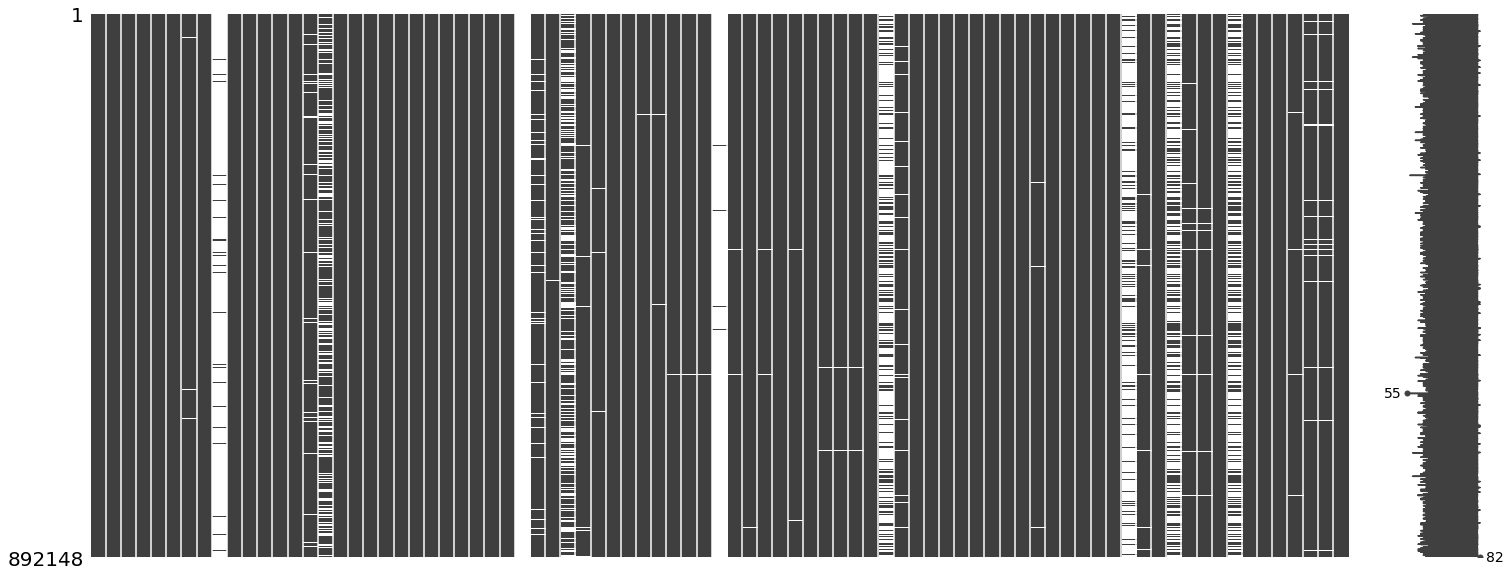

In [15]:
_ = msno.matrix(df_trn.sample(frac=0.1))